In [1]:
#Importing the required libraries
import pandas as pd 
import seaborn as sns
import numpy as np    #for matrix multiplications during forward and backward propagations
import matplotlib.pyplot as plt #for plotting the error plot
from sklearn.model_selection import train_test_split #for splitting the data into train and test
from math import sqrt 

In [2]:
#reading the data file
df = pd.read_csv('ce889_dataCollection.csv',header = None)
df.head()

,0,1,2,3
0,-464.13699,287.900000,0.000000,0.000000
1,-464.13699,287.900000,-0.100000,0.040000
2,-464.17699,288.000000,-0.200000,0.000000
3,-464.17699,288.200000,-0.299878,0.033020
4,-464.21001,288.499878,-0.399391,-0.020931


In [3]:
#for dropping the duplicates
df.drop_duplicates(inplace = True) 

In [4]:
#checking for null values
df.isnull().sum()

0    0
1    0
2    0
3    0
dtype: int64

In [5]:
## Giving column names
df.columns = ["X distance to target","Y distance to target","New Vel Y","New Vel X"]
df.head()

,X distance to target,Y distance to target,New Vel Y,New Vel X
0,-464.13699,287.900000,0.000000,0.000000
1,-464.13699,287.900000,-0.100000,0.040000
2,-464.17699,288.000000,-0.200000,0.000000
3,-464.17699,288.200000,-0.299878,0.033020
4,-464.21001,288.499878,-0.399391,-0.020931


In [6]:
df.describe()

,X distance to target,Y distance to target,New Vel Y,New Vel X
count,42452.000000,42452.000000,42452.000000,42452.000000
mean,-2.714413,375.673574,0.885515,-0.197484
std,173.753766,118.884806,3.125086,1.553808
min,-525.059588,65.131400,-5.126444,-5.268303
25%,-58.897841,297.116498,-1.751738,-0.978456
50%,11.174910,380.102956,0.366213,-0.015031
75%,51.223445,464.259652,3.075331,0.351387
max,522.694462,630.669794,7.999783,5.416439


In [7]:
#normalization
data_min = df.min()
data_max = df.max()
normalizeddata = (df - df.min()) / (df.max() - df.min())
normalizeddata.head()

,X distance to target,Y distance to target,New Vel Y,New Vel X
0,0.058146,0.393905,0.390550,0.493068
1,0.058146,0.393905,0.382931,0.496812
2,0.058108,0.394082,0.375313,0.493068
3,0.058108,0.394436,0.367704,0.496158
4,0.058076,0.394966,0.360123,0.491109


In [8]:
normalizeddata.describe()

,X distance to target,Y distance to target,New Vel Y,New Vel X
count,42452.000000,42452.000000,42452.000000,42452.000000
mean,0.498538,0.549109,0.458011,0.474585
std,0.165834,0.210215,0.238080,0.145423
min,0.000000,0.000000,0.000000,0.000000
25%,0.444915,0.410202,0.257096,0.401493
50%,0.511794,0.556941,0.418449,0.491661
75%,0.550017,0.705749,0.624839,0.525955
max,1.000000,1.000000,1.000000,1.000000


In [9]:
#spliting data
training , testing= train_test_split(normalizeddata, test_size = 0.2)
print(training.shape)
print(testing.shape)

(33961, 4)
(8491, 4)


C:\Users\yaswa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Y distance to target'>

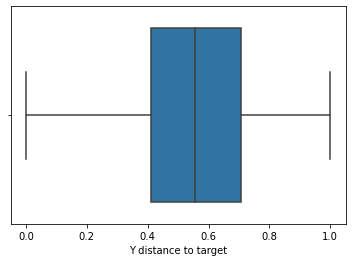

In [25]:
sns.boxplot(training['Y distance to target'])

C:\Users\yaswa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='New Vel Y'>

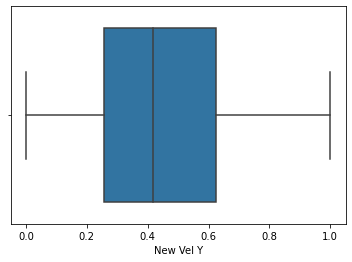

In [10]:
# no outliers
sns.boxplot(training['New Vel Y'])

In [11]:
#Splitting inputs & outputs for training, validation & testing data
x_train_input = np.array(training[["X distance to target","Y distance to target"]]).T
y_train_output = np.array(training[["New Vel Y","New Vel X"]]).T

x_testing_input = np.array(testing[["X distance to target","Y distance to target"]]).T
y_testing_output = np.array(testing[["New Vel Y","New Vel X"]]).T

In [12]:
#Defining Sigmoid Function
def sigmoid(x):  
    return 1/(1+np.exp(-x*0.01))
def sigmoid_derivative(x):  
    return x*(1-x)

In [13]:
#Forward Propagation
def fwd_propagation(x_fwd_input, model):    
    Weight_hidden, bias_hidden, Weight_output, bias_output = model['w1'], model['b1'], model['w2'], model['b2']
    z1 = np.dot(Weight_hidden, x_fwd_input) +bias_hidden
    a1 = sigmoid(z1)     #activation layer
    z2 = np.dot(Weight_output, a1) + bias_output
    a2 = sigmoid(z2)
    return(a2)   

In [14]:
#Backward Propagation
def back_propagation(model,x_train_input, a2, error, r_lambda, l_rate, epsilon):
    Weight_hidden, bias_hidden, Weight_output, bias_output, dWeight_hidden_old, dWeight_output_old = model['w1'], model['b1'], model['w2'], model['b2'], model['dw1_old'], model['dw2_old']
    
    delta2 = r_lambda *(error * sigmoid_derivative(a2))
    a1 = sigmoid(np.dot(Weight_hidden, x_train_input) +bias_hidden)  
    delta1 = r_lambda * np.dot(Weight_output.T, delta2)*sigmoid_derivative(a1)
      
    dWeight_output = np.dot(delta2, a1.T)
    dWeight_hidden = np.dot(delta1, x_train_input.T)
    dbias_output = np.sum(delta2, axis=1, keepdims=True)
    dbias_hidden = np.sum(delta1, axis=1, keepdims=True)
    
    # update the weights with the derivative (slope) of the loss function
    Weight_hidden += l_rate*dWeight_hidden + epsilon * dWeight_hidden_old
    Weight_output += l_rate*dWeight_output + epsilon * dWeight_output_old
    bias_hidden += l_rate*dbias_hidden
    bias_output += l_rate*dbias_output
    # Assign new parameters to the model
    model = { 'w1': Weight_hidden, 'b1': bias_hidden, 'w2': Weight_output, 'b2': bias_output, "dw1_old":dWeight_hidden, "dw2_old": dWeight_output}
    return model

In [15]:
#calculating loss
def calculate_loss(model, x_trainloss, y_trainloss):
    #calling model prediction
    Weight_hidden, bias_hidden, Weight_output, bias_output = model['w1'], model['b1'], model['w2'], model['b2']
    z1 = np.dot(Weight_hidden, x_trainloss) +bias_hidden
    a1 = sigmoid(z1)  #activation layer
    z2 = np.dot(Weight_output, a1) + bias_output
    a2 = sigmoid(z2) 
    rmserror = np.mean(np.square(y_trainloss - a2))
    z2 = np.dot(Weight_output, a1) + bias_output
    a2 = sigmoid(z2)
    return rmserror

In [16]:
def build_model(x_train_input, y_train_output,n_hidden, r_lambda, l_rate, epsilon, epochs):
    
    #initialize parameters to random values
    Weight_hidden = np.random.rand(n_hidden,2) 
    bias_hidden = np.zeros((n_hidden,1))
    Weight_output = np.random.rand(2,n_hidden) 
    bias_output = np.zeros((2,1))
    
    #gradient momentum initilizations
    dWeight_hidden_old = np.zeros((n_hidden,2))
    dWeight_output_old = np.zeros((2,n_hidden))
    
    #Declaring dictonary for storing parameters for later use
    model = {}
    
    # Assign new parameters to the model
    model = { 'w1': Weight_hidden,'b1': bias_hidden, 'w2': Weight_output, 'b2': bias_output, "dw1_old":dWeight_hidden_old, "dw2_old": dWeight_output_old}
    
    training_loss= []

    for i in range(0, epochs):
        
        #forward propagation
        a2 = fwd_propagation(x_train_input, model)
        error = 2*(y_train_output - a2)
        
        #backward propagation
        model = back_propagation(model,x_train_input, a2, error, r_lambda, l_rate, epsilon)
                
        rmserror  = calculate_loss(model, x_train_input, y_train_output)

        training_loss.append(rmserror)
        
        # Optionally print the loss.
        # This is expensive because it uses the whole dataset, so we don't want to do it too often.
        if i % 100 == 0:
            print("Loss after iteration %i: training loss = %f  " %(i,rmserror))
     
    return model, training_loss

In [17]:
# Giving the hyperparameters, training the model and finding the loss
model, training_loss = build_model(x_train_input, y_train_output,n_hidden= 5, epochs = 501, epsilon=0.1, r_lambda = 0.1, l_rate=0.01)

Loss after iteration 0: training loss = 0.040074  
Loss after iteration 100: training loss = 0.038183  
Loss after iteration 200: training loss = 0.032597  
Loss after iteration 300: training loss = 0.029233  
Loss after iteration 400: training loss = 0.026127  
Loss after iteration 500: training loss = 0.023709  


In [18]:
print("self.Weight_hidden =", repr(model["w1"]), "\nself.Weight_output = ",repr(model["w2"]), "\nself.bias_hidden = ",repr(model["b1"]),"\nself.bias_output = ",repr(model["b2"]))

self.Weight_hidden = array([[-677.8657577 ,  293.21609712],
       [ 310.85426005,  -33.27075034],
       [ -89.35340876,  712.71561139],
       [-221.79969804,   68.21609645],
       [-487.20843895,  191.74063969]]) 
self.Weight_output =  array([[ -90.22983468,  131.63325244, -206.01657252,   81.80458632,
         -42.21438051],
       [-145.8001321 ,   19.17999706,   49.06887314,  -86.18478742,
         -86.98333264]]) 
self.bias_hidden =  array([[ -8.63085542],
       [ 63.20364078],
       [-98.96167218],
       [ 25.29319223],
       [-36.46292461]]) 
self.bias_output =  array([[37.23317632],
       [ 6.91630519]])


In [19]:
model, training_loss = build_model(x_testing_input, y_testing_output,n_hidden= 5, epochs = 501, epsilon=0.1, r_lambda = 0.1, l_rate=0.01)

Loss after iteration 0: training loss = 0.040262  
Loss after iteration 100: training loss = 0.038824  
Loss after iteration 200: training loss = 0.038688  
Loss after iteration 300: training loss = 0.038508  
Loss after iteration 400: training loss = 0.038251  
Loss after iteration 500: training loss = 0.037857  


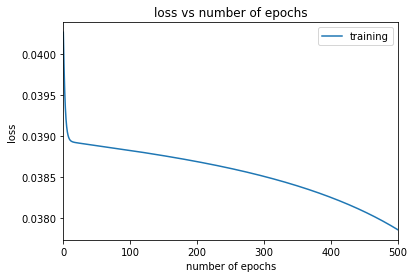

In [20]:
def plot_erros(training_loss):
    plt.plot(training_loss)
    plt.xlabel('number of epochs')
    plt.ylabel('loss')
    plt.title('loss vs number of epochs')
    plt.legend(['training'], loc='upper right')
    plt.xlim(0, 500)
    plt.show()
plot_erros(training_loss)

In [21]:
y_prediction = fwd_propagation(x_testing_input, model)
y_prediction_df = pd.DataFrame(y_prediction.T,columns=["New Vel Y","New Vel X"])
y_prediction_df.head()

,New Vel Y,New Vel X
0,0.445183,0.468464
1,0.453921,0.473395
2,0.450152,0.471287
3,0.457798,0.475567
4,0.446630,0.469373


In [22]:
#RMSerror for normalized data
rmserror_test = np.mean(np.square( (y_testing_output.T) - y_prediction_df))
rmserror_test

New Vel Y    0.054815
New Vel X    0.020899
dtype: float64

In [23]:
#denormalize predicted data
y_prediction_df['New Vel Y'] = data_min['New Vel Y'] + y_prediction_df['New Vel Y']*(data_max['New Vel Y'] - data_min['New Vel Y']) 
y_prediction_df['New Vel X'] = data_min['New Vel X'] + y_prediction_df['New Vel X']*(data_max['New Vel X'] - data_min['New Vel X']) 

In [24]:
y_prediction_df.describe()

,New Vel Y,New Vel X
count,8491.000000,8491.000000
mean,0.753531,-0.246362
std,0.111030,0.050299
min,0.488404,-0.367070
25%,0.667685,-0.285349
50%,0.742207,-0.251309
75%,0.836065,-0.208833
max,1.011812,-0.130245
